**1. Data Preparation**

In [ ]:
# import required library
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import zipfile, os
import matplotlib.pyplot as plt

In [ ]:
# mount google colab to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# download data from https://www.kaggle.com/datasets/vijaykumar1799/face-mask-detection
# extract zip file
local_zip = '/content/drive/MyDrive/Colab Notebooks/mask.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

#dataset foldering and data conditioning using image data generator
train_dir = os.path.join('/tmp/Dataset')
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   horizontal_flip=True,
                                   shear_range=0.2,
                                   fill_mode='nearest',
                                   validation_split=0.2)

In [ ]:
# create data flow
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=8,
    class_mode='categorical',
    subset='training')
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=16,
    class_mode='categorical',
    subset='validation')

Found 7188 images belonging to 3 classes.
Found 1794 images belonging to 3 classes.


**2. Model Construction**

In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.compile(optimizer=tf.optimizers.Adam(),
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

**3. Model Training & Testing**

In [ ]:
# add callbacks to save model training runtime
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.92 and logs.get('val_accuracy')>0.92):
      print("\nAkurasi train & test telah mencapai >92%!")
      self.model.stop_training = True
callbacks = myCallback()

In [ ]:
history = model.fit(train_generator,
                    validation_data=validation_generator,
                    epochs=50,
                    verbose=2,
                    callbacks=[callbacks])

Epoch 1/50
899/899 - 428s - loss: 0.4898 - accuracy: 0.8030 - val_loss: 0.3885 - val_accuracy: 0.8361
Epoch 2/50
899/899 - 425s - loss: 0.2342 - accuracy: 0.9121 - val_loss: 0.2168 - val_accuracy: 0.9337
Epoch 3/50
899/899 - 422s - loss: 0.1828 - accuracy: 0.9338 - val_loss: 0.1822 - val_accuracy: 0.9392

Akurasi train & test telah mencapai >92%!


**4. Train & Test Process Visualization**

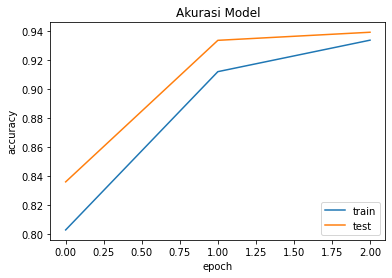

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()

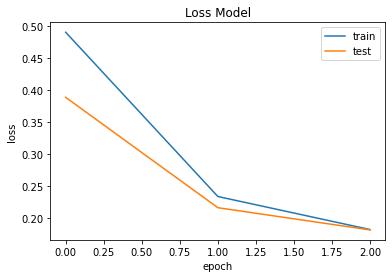

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

**5. Interactive Testing**

Saving WhatsApp Image 2021-07-28 at 7.07.54 AM.jpeg to WhatsApp Image 2021-07-28 at 7.07.54 AM.jpeg
WhatsApp Image 2021-07-28 at 7.07.54 AM.jpeg
with mask


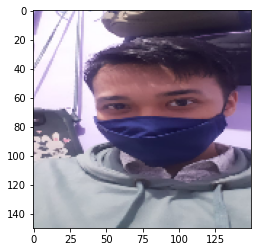

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('mask weared but incorrect')
  elif classes[0,1]!=0:
    print('with mask')
  else:
    print('without mask')

Saving WhatsApp Image 2021-07-14 at 11.56.39 AM.jpeg to WhatsApp Image 2021-07-14 at 11.56.39 AM.jpeg
WhatsApp Image 2021-07-14 at 11.56.39 AM.jpeg
without mask


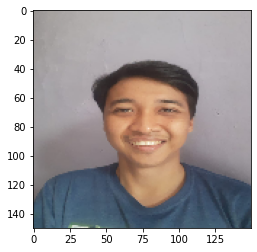

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('mask weared but incorrect')
  elif classes[0,1]!=0:
    print('with mask')
  else:
    print('without mask')

Saving WhatsApp Image 2021-07-28 at 7.22.29 AM.jpeg to WhatsApp Image 2021-07-28 at 7.22.29 AM.jpeg
WhatsApp Image 2021-07-28 at 7.22.29 AM.jpeg
without mask


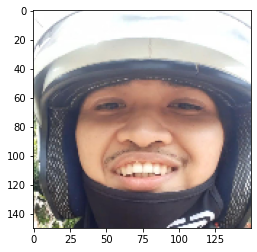

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('mask weared but incorrect')
  elif classes[0,1]!=0:
    print('with mask')
  else:
    print('without mask')

Saving WhatsApp Image 2021-07-28 at 7.39.24 AM.jpeg to WhatsApp Image 2021-07-28 at 7.39.24 AM (1).jpeg
WhatsApp Image 2021-07-28 at 7.39.24 AM.jpeg
with mask


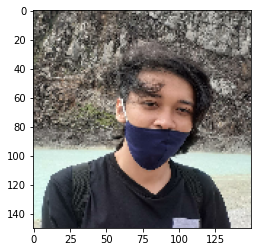

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('mask weared but incorrect')
  elif classes[0,1]!=0:
    print('with mask')
  else:
    print('without mask')

Saving WhatsApp Image 2021-07-28 at 8.41.49 AM.jpeg to WhatsApp Image 2021-07-28 at 8.41.49 AM.jpeg
WhatsApp Image 2021-07-28 at 8.41.49 AM.jpeg
mask-weared but incorrect


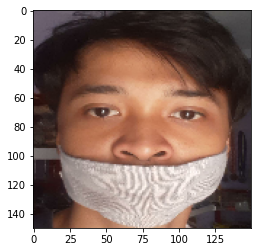

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print(fn)
  if classes[0,0]!=0:
    print('with mask')
  elif classes[0,1]!=0:
    print('mask-weared but incorrect')
  else:
    print('without mask')